In [1]:
import os
import numpy as np
import pandas as pd
import csv

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(context="paper", font_scale=1.5, rc={"lines.linewidth": 2}, font='DejaVu Serif')
#import bottleneck as bn

In [2]:
def loadFilesNamePath(directorRoot: str):
    l_files_name_path = []
    for path, subdirs, files in os.walk(directorRoot):
        for name in files:
            l_files_name_path.append(os.path.join(path, name))
    return l_files_name_path

In [3]:
def loadFile(file_name):
    with open(file_name, 'r') as f:
        file_data = f.read()
        f.close()
    return file_data.splitlines()

In [4]:
"""
========
Function Generating Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
def barCharGenerator(groupListData: list, ListLabel: list, groupListLegend: list
                     , ylabel: str, xlabel: str, title: str, figSize=(15, 9)):
    N = 4
    ind = np.arange(N)  # the x locations for the groups
    width = 0.12       # the width of the bars
    std_CoFactor = [0.01, 0.01, 0.01, 0.01]
    std_1 = [0.02, 0.02, 0.02, 0.02]
    std_2 = [0.01, 0.01, 0.01, 0.01]
    std_3 = [0.02, 0.02, 0.02, 0.02]
    std_4 = [0.01, 0.01, 0.01, 0.01]
    std_5 = [0.01, 0.01, 0.01, 0.01]
    
    #Zerando os pausinhos em cima das barras
    std_CoFactor = std_1 = std_2 = std_3 = std_4 = std_5 = [0,0,0,0]
    
    CoFactor = groupListData[0]
    Other_1 = groupListData[1]
    Other_2 = groupListData[2]
    Other_3 = groupListData[3]
    Other_4 = groupListData[4]
    Other_5 = groupListData[5]

    #Define Plot
    fig, ax = plt.subplots(figsize=figSize)

    rects1 = ax.bar(ind, CoFactor, width, color='yellow', yerr=std_CoFactor)
    rects2 = ax.bar(ind + width, Other_1, width, color='olive', yerr=std_1)
    rects3 = ax.bar(ind + width*2, Other_2, width, color='darkkhaki', yerr=std_2)
    rects4 = ax.bar(ind + width*3, Other_3, width, color='darkseagreen', yerr=std_3)
    rects5 = ax.bar(ind + width*4, Other_4, width, color='lightgreen', yerr=std_4)
    rects6 = ax.bar(ind + width*5, Other_5, width, color='darkolivegreen', yerr=std_5)

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(ind + (width*5) / 2)
    ax.set_xticklabels(ListLabel)

    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]) , groupListLegend)
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.01))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

    def autolabel(rects, mult_height):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., mult_height*height,
                    '%2.4f' % float(height),
                    ha='center', va='bottom')

    '''autolabel(rects1, 1.05)
    autolabel(rects2, 1.13)
    autolabel(rects3, 1.05)
    autolabel(rects4, 1.13)
    autolabel(rects5, 1.05)
    autolabel(rects6, 1.13)'''

    plt.show()

In [5]:
def prepraraFiles(list_file_name: list, file_path: str):    
    CoFactor_dic = {'Recall@10':0.1640,'Recall@20':0.1611, 'Recall@50':0.1842, 'Recall@100': 0.2381
                            , 'NDCG@10': 0.1675, 'NDCG@20': 0.1601, 'NDCG@50': 0.1615, 'NDCG@100': 0.1803
                            , 'MAP@10': 0.0965, 'MAP@20': 0.0780, 'MAP@50': 0.0625, 'MAP@100': 0.0593}
    file_dic = {}

    for f_name in list_file_name:
        file_name = f_name.split('_')
        key_name = str.capitalize(file_name[0])+'_'+str.capitalize(file_name[1])+'_'+file_name[2]+'%'
        list_file_content = loadFile(file_path+f_name)
        list_file_content = list(filter(None, list_file_content))
        data_dic = {}

        for line in list_file_content:
            idx = list_file_content.index(line)
            line = line.replace('Test ','').replace(' ','').split(':')
            data_dic[line[0]]=float(line[1])

        file_dic[key_name]=data_dic
    return CoFactor_dic, file_dic

In [6]:
def startCoFactorValues(CoFactor_dic: dict):
    #Determinando Cofactor Dados
    listDataNdcgCoFactor = []
    listDataRecallCoFactor = []
    listDataMapCoFactor = []
    control = 0
    
    for key, value in CoFactor_dic.items():
        control = control+1
        #Armazena Recall
        if (control in np.arange(1,5)):
            listDataRecallCoFactor.append(value)
        #Armazena NDCG
        elif (control in np.arange(5,9)):
            listDataNdcgCoFactor.append(value)
        #Armazena MAP
        elif (control in np.arange(9,13)):
            listDataMapCoFactor.append(value)

    return listDataNdcgCoFactor, listDataMapCoFactor, listDataRecallCoFactor

In [7]:
def geraGraficos(Cofactor_dic: dict, file_dic: dict, firstGroupFile: bool ):
    groupListDataNDCG = []
    groupListDataRECALL = []
    groupListDataMAP = []
    listLabel = []

    ndcg_coFactor, mapCofactor, recall_coFactor = startCoFactorValues(CoFactor_dic)

    groupListDataMAP.append(mapCofactor)
    groupListDataNDCG.append(ndcg_coFactor)
    groupListDataRECALL.append(recall_coFactor)
    listLabel.append('CoFactor')

    #Parametros de controle
    control = 0
    contador = 0


    for key_title, value_list in file_dic.items():
        cnn_name = key_title.split('_')
        listLabel.append(key_title)

        listDataNdcg = []
        listDataRecall = []
        listDataMap = []

        for key_name, value in value_list.items():
            control = control+1

            #Armazena Recall
            if (control in np.arange(1,5)):
                listDataRecall.append(value)
            #Armazena NDCG
            elif (control in np.arange(5,9)):
                listDataNdcg.append(value)
            #Armazena MAP
            elif (control in np.arange(9,13)):
                listDataMap.append(value)

        groupListDataNDCG.append(listDataNdcg)
        groupListDataMAP.append(listDataMap)
        groupListDataRECALL.append(listDataRecall)

        control = 0

        contador = contador + 1
        if contador == 5:
            contador = 0

            barCharGenerator(groupListDataRECALL, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','Recall@k', 'Comparação CoFactor Vs '+cnn_name[0])
            
            print('Recall Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)
            
            print('\n\n')    
            barCharGenerator(groupListDataNDCG, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','NDCG@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('NDCG Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            print('\n\n')    
            barCharGenerator(groupListDataMAP, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','MAP@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('MAP Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            groupListDataNDCG.clear()
            groupListDataRECALL.clear()
            groupListDataMAP.clear()
            listLabel.clear()

            groupListDataMAP.append(mapCofactor)
            groupListDataNDCG.append(ndcg_coFactor)
            groupListDataRECALL.append(recall_coFactor)
            listLabel.append('CoFactor')

In [8]:
file_path = 'cae_inv_norm/'

### Definição dos Dados - Descritivo

Os valores apresentados abaixo nos gráficos, correspondem aos resultados obtidos do Algoritmo CoFactor. A Barra amarela correponde a entrada padrão dos dados, no qual o algoritmo trabalha com a co-ocorrência de itens. As demais barras correpondem a entrada gerada atráves do procedimento a ser descrito abaixo.

#### Redes Neurais Convolutivas

O dataset de imagens (ml20m) foi aplicado a quatro redes neurais convolutivas para extração de suas features. Foram elas Resnet50, Vgg16, Vgg19 e Xception. Uma vez que essas features foram extraídas, uma segunda feature foi extraída de informações textuais do mesmo dataset utilizando uma rede neural chamada Doc2vec. 

Cada feature extraídas da imagens foram concatenadas com a feature de informações textuais, gerando um novo vetor de features.
- Resnet50+Doc2Vec / Vgg16+Doc2Vec / Vgg19+Doc2Vec / Xception+Doc2Vec

#### AutoEnconder's

Cada vetor de features "concatenado" foi aplicado a um tipo de AutoEnconder com o objetivo de gerar uma nova representação do vetor de features original. Os autoencoder's utilizados foram Sparse AutoEncoder, Convolutional AutoEnconder (CAE) e Varitional AutoEncoder (VAE).

As representações geradas do vetor de featuares concatenado, após aplicadas nos autoencoder's foram:

10% - Uma representação com 10% do tamanho do vetor original

20% - Uma representação com 20% do tamanho do vetor original

30% - Uma representação com 30% do tamanho do vetor original

40% - Uma representação com 40% do tamanho do vetor original

50% - Uma representação com 50% do tamanho do vetor original

60% - Uma representação com 60% do tamanho do vetor original

70% - Uma representação com 70% do tamanho do vetor original

80% - Uma representação com 80% do tamanho do vetor original

90% - Uma representação com 90% do tamanho do vetor original

100% - Uma representação com 100% do tamanho do vetor original


### Matriz de Similaridade

Foi gerado uma matrix de similaridade entre os vetores de características (vetor final gerado a partir do AutoEncoder) utilizando o método da "Distância Euclideana". Para os resultados apresentados nesse documento foi utilizado uma "Distância Euclideana Invertida e Normalizada", ou seja, valores muito proxímos de zero (ou zero) corresponde a vetores que não possuem similaridade nenhum, em contrapartida valores próximos ou igual a 1 corresponde a itens muito similares  ou identicos (o mesmo vetor).

### Metricas de Avaliação
Medidas de avaliação (ranked-based) foram utilizadas para medir o desempenho da recomendação do algoritmo ao mudar seu dataset de entrada em comparação com o dataset original proposto (co-ocorrência).

Para cada usuário, todas as métricas comparam a classficação prevista de itens "não observados" com sua classificação real. As medidas utilizadas foram Recall, NDCG e Map.

Nos resultados apresentados nos gráficos que seguem, foram considerados nos experimentos um "ranked list" de tamanhos fixados em: 10, 20, 50 e 100, para cada medida de avaliação, por exemplo, NDCG@20 significado que foi considerado um ranked list dos 20 itens no topo da lista.

### Análise Geral
Nós Gráficos apresentados nesse documento que estão relacionados ao AutoEncoder "CAE" é possível verificar que mesmo alterando o tipo da rede neural (vgg's, resnet ou xception) eles apresentam um comportamento bastante similar.

Para a métrica "Recall" quanto maior o valor de @k melhor o resultado.

Para métrica NDCG, os valores de @k entre 10 e 50 tem resultados similares, no entanto, para um @k de 100 o desempenho do algoritmo aumenta. Na métrica de avaliação MAP o algoritmo tem um comportamento contrário ao Recall, quanto maior o valor de @k pior foi seu desempenho.

Comparado a outras duas abordagens (Sparse e VAE) as matrizes provenientes do AutoEncoder CAE mostraram ser as mais promissoras.

Em todas as Comparações o BaseLine (CoFactor) utilizado apresentou melhor resultado do que as representações propostas do vetor original.

## Gráficos CoFactor Vs Rede Neural Resnet50

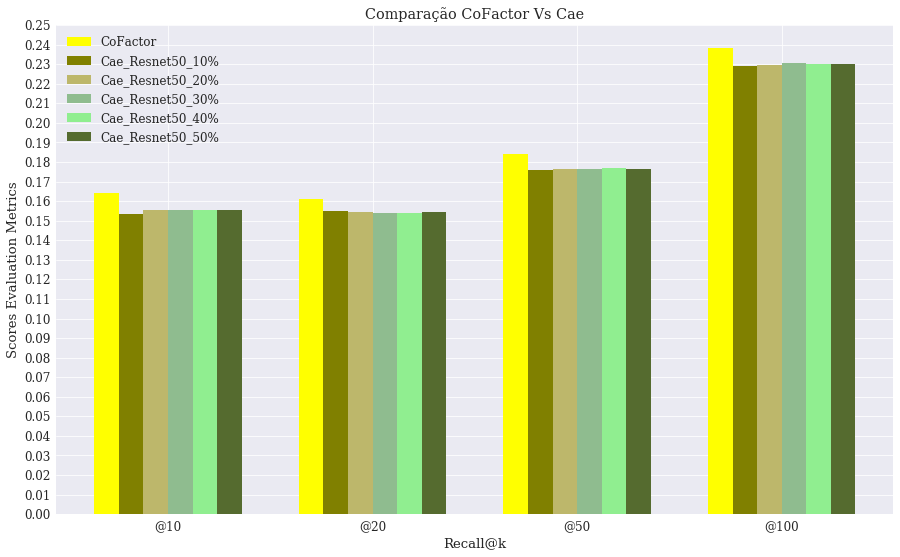

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1535  0.1548  0.1758  0.2292
20%       0.1553  0.1542  0.1764  0.2296
30%       0.1553  0.1541  0.1765  0.2305
40%       0.1554  0.1538  0.1767  0.2303
50%       0.1556  0.1543  0.1763  0.2301





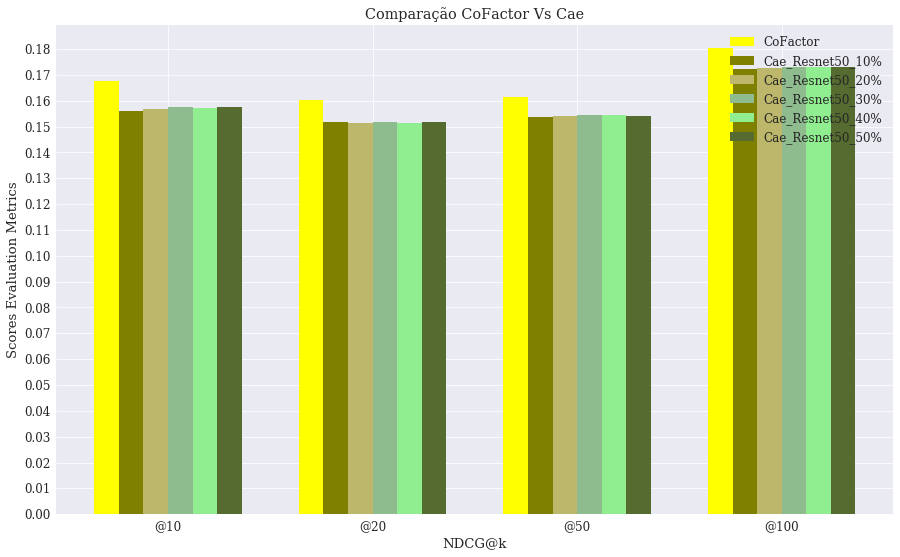

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1560  0.1516  0.1538  0.1724
20%       0.1569  0.1512  0.1540  0.1727
30%       0.1577  0.1517  0.1545  0.1732
40%       0.1573  0.1515  0.1543  0.1730
50%       0.1574  0.1516  0.1540  0.1729





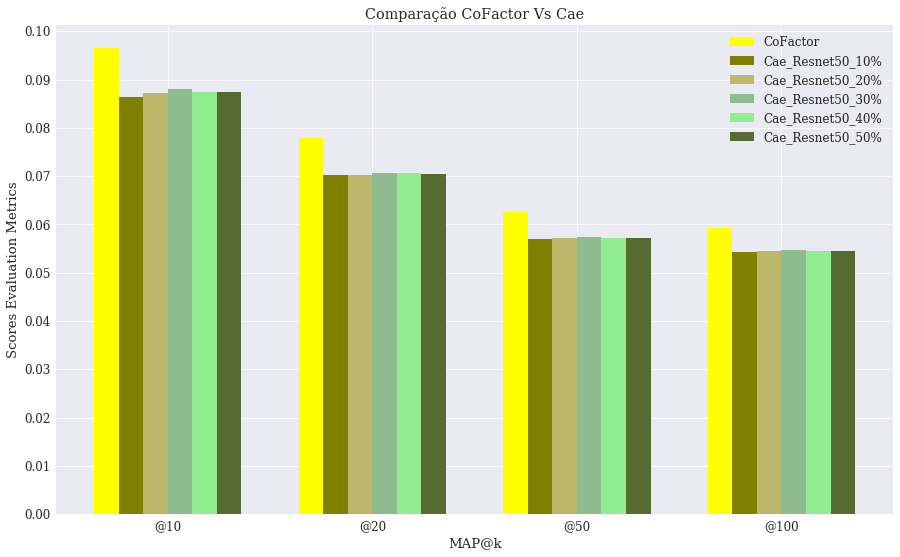

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0864  0.0702  0.0569  0.0543
20%       0.0872  0.0703  0.0572  0.0546
30%       0.0880  0.0706  0.0574  0.0547
40%       0.0875  0.0706  0.0572  0.0546
50%       0.0875  0.0705  0.0571  0.0545


In [9]:
list_file_name = ['cae_resnet50_10_pct_rec_val'
                  , 'cae_resnet50_20_pct_rec_val'
                  , 'cae_resnet50_30_pct_rec_val'
                  , 'cae_resnet50_40_pct_rec_val'
                  , 'cae_resnet50_50_pct_rec_val']

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

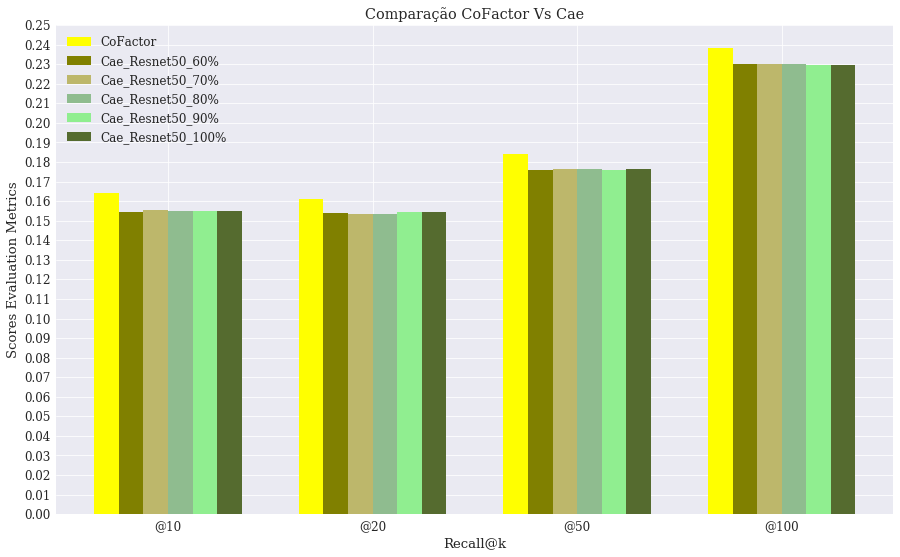

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1545  0.1538  0.1761  0.2299
70%       0.1554  0.1536  0.1762  0.2301
80%       0.1549  0.1536  0.1764  0.2300
90%       0.1548  0.1544  0.1761  0.2296
100%      0.1549  0.1543  0.1762  0.2293





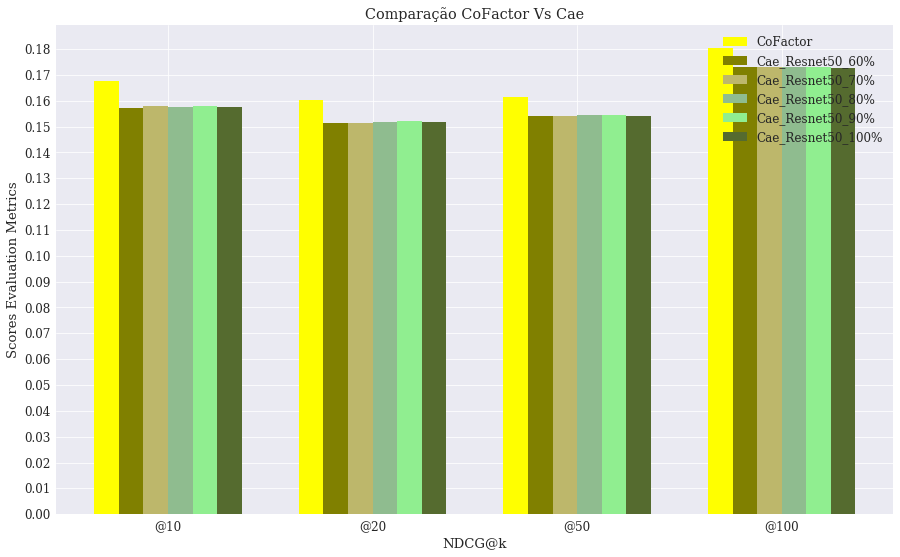

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1572  0.1515  0.1542  0.1729
70%       0.1578  0.1514  0.1542  0.1729
80%       0.1576  0.1516  0.1544  0.1729
90%       0.1578  0.1520  0.1543  0.1729
100%      0.1574  0.1519  0.1541  0.1726





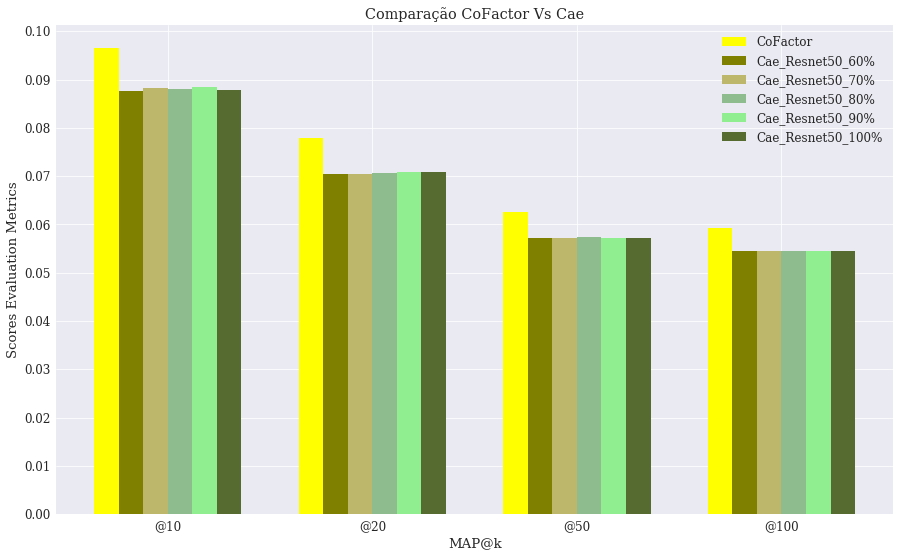

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0877  0.0704  0.0573  0.0546
70%       0.0882  0.0704  0.0572  0.0545
80%       0.0881  0.0706  0.0574  0.0546
90%       0.0884  0.0708  0.0573  0.0546
100%      0.0878  0.0708  0.0573  0.0545


In [10]:
list_file_name = ['cae_resnet50_60_pct_rec_val'
                  , 'cae_resnet50_70_pct_rec_val'
                  , 'cae_resnet50_80_pct_rec_val'
                  , 'cae_resnet50_90_pct_rec_val'
                  , 'cae_resnet50_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg16

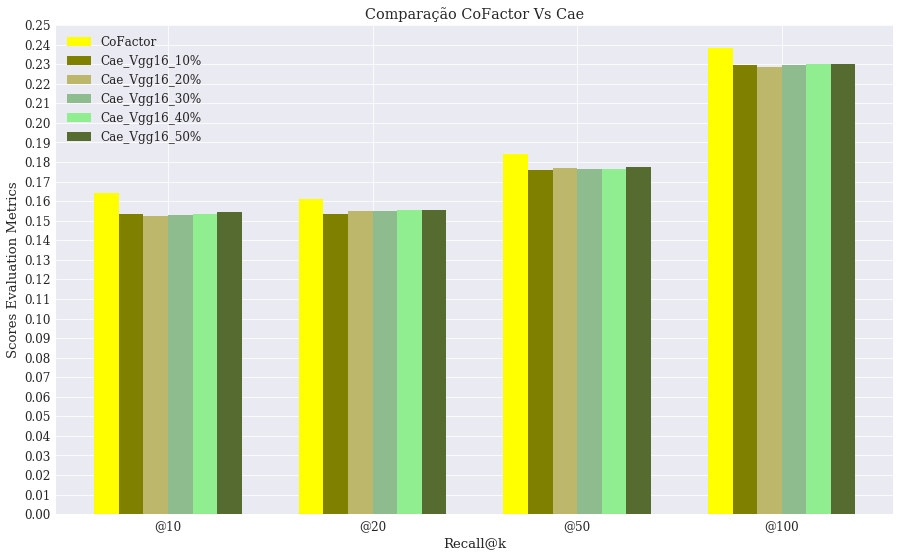

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1536  0.1536  0.1758  0.2295
20%       0.1526  0.1547  0.1769  0.2285
30%       0.1531  0.1547  0.1762  0.2293
40%       0.1534  0.1553  0.1765  0.2299
50%       0.1545  0.1552  0.1774  0.2301





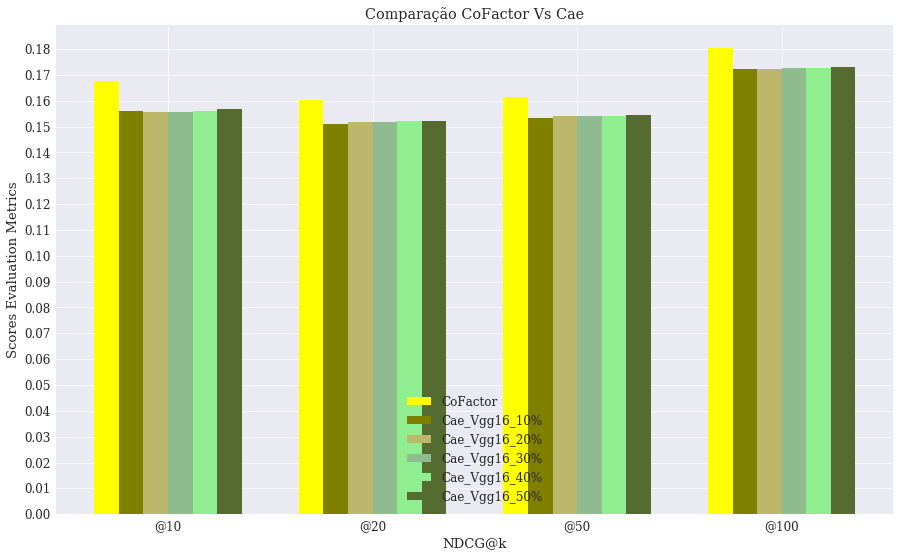

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1559  0.1508  0.1535  0.1722
20%       0.1556  0.1516  0.1540  0.1722
30%       0.1558  0.1517  0.1540  0.1725
40%       0.1562  0.1521  0.1542  0.1728
50%       0.1569  0.1521  0.1546  0.1730





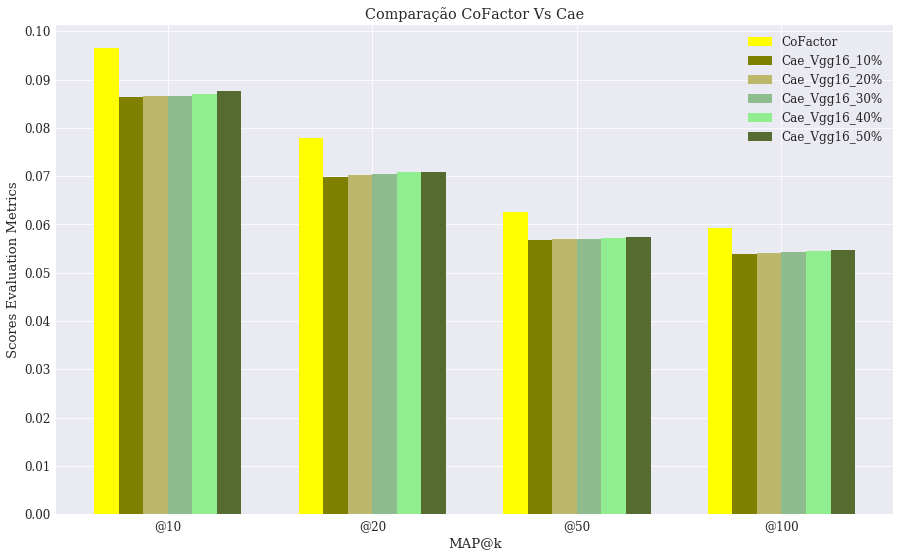

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0865  0.0698  0.0567  0.0539
20%       0.0866  0.0703  0.0569  0.0541
30%       0.0867  0.0704  0.0570  0.0544
40%       0.0871  0.0708  0.0573  0.0546
50%       0.0876  0.0709  0.0575  0.0547


In [11]:
list_file_name = ['cae_vgg16_10_pct_rec_val'
                  , 'cae_vgg16_20_pct_rec_val'
                  , 'cae_vgg16_30_pct_rec_val'
                  , 'cae_vgg16_40_pct_rec_val'
                  , 'cae_vgg16_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

#### Análise

Mesmo alterando a Rede Neural para Vgg16 o comportamento e resultados foram os mesmos apresentados na ResNet50

-------------------------------------------------------------------------------------------------------------------

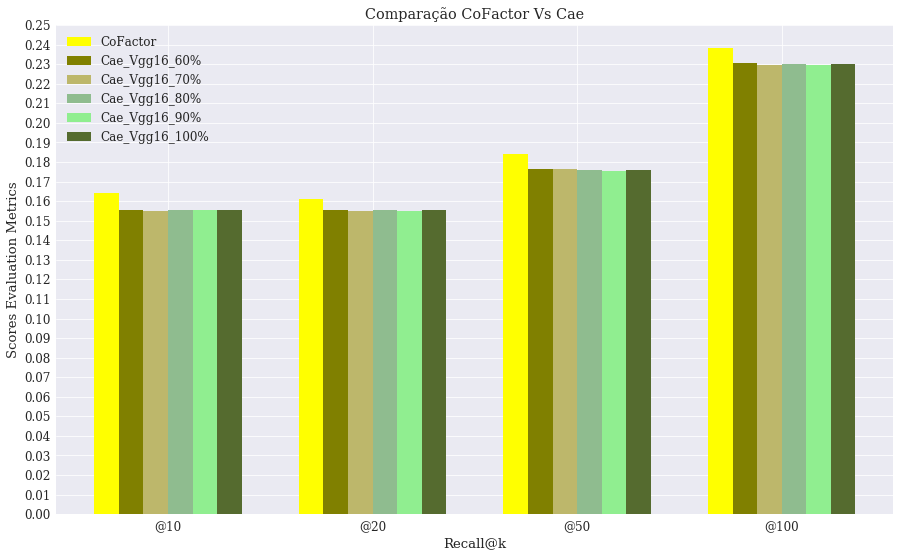

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1552  0.1553  0.1763  0.2306
70%       0.1547  0.1551  0.1763  0.2296
80%       0.1557  0.1553  0.1759  0.2300
90%       0.1554  0.1549  0.1756  0.2297
100%      0.1552  0.1553  0.1758  0.2298





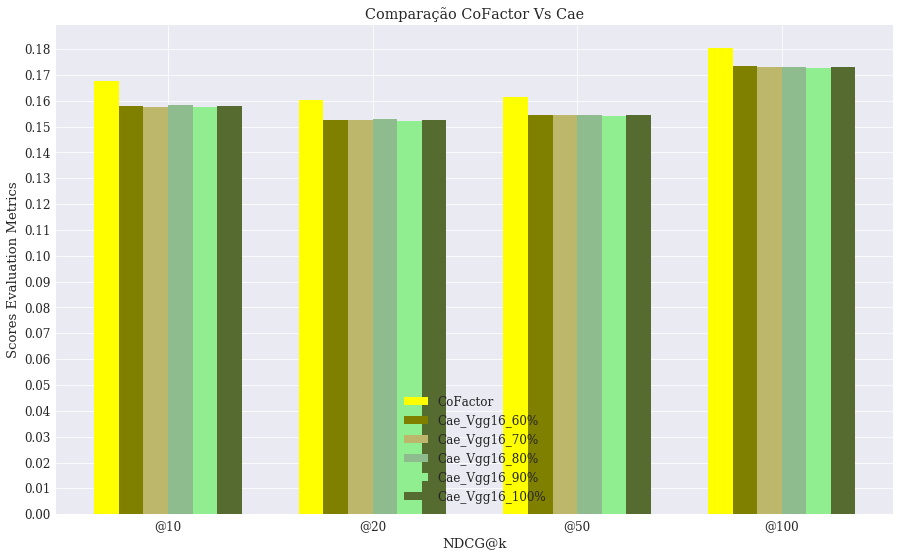

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1579  0.1527  0.1546  0.1734
70%       0.1576  0.1525  0.1545  0.1730
80%       0.1582  0.1528  0.1545  0.1731
90%       0.1577  0.1523  0.1542  0.1728
100%      0.1578  0.1527  0.1543  0.1729





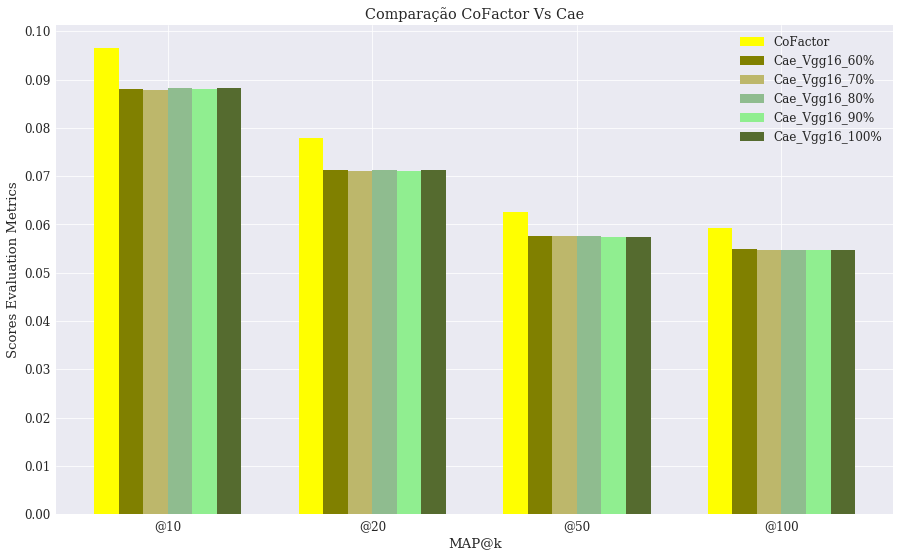

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0880  0.0712  0.0576  0.0549
70%       0.0879  0.0710  0.0576  0.0548
80%       0.0883  0.0713  0.0576  0.0548
90%       0.0880  0.0711  0.0575  0.0547
100%      0.0883  0.0713  0.0575  0.0547


In [12]:
list_file_name = ['cae_vgg16_60_pct_rec_val'
                  , 'cae_vgg16_70_pct_rec_val'
                  , 'cae_vgg16_80_pct_rec_val'
                  , 'cae_vgg16_90_pct_rec_val'
                  ,'cae_vgg16_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

#### Análise

Mesmo alterando a Rede Neural para Vgg16 o comportamento e resultados foram os mesmos apresentados na ResNet50

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg19

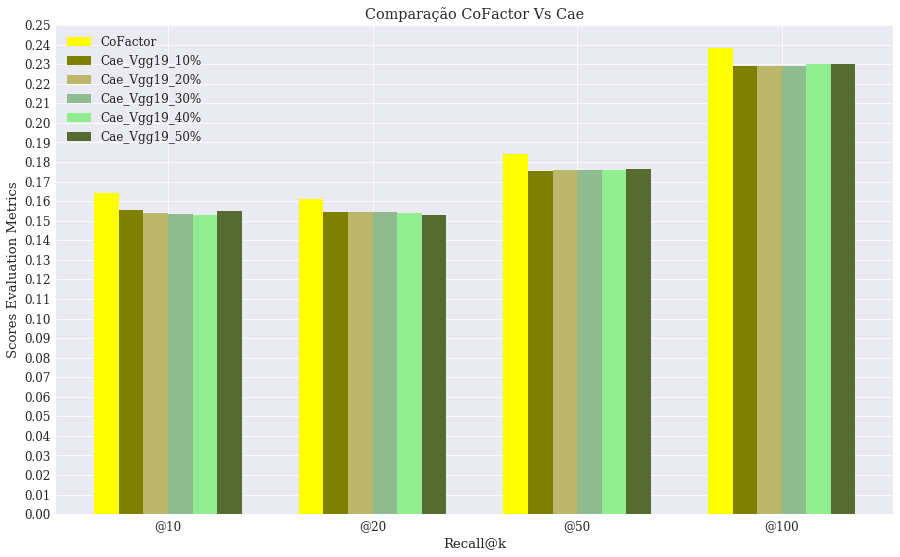

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1553  0.1542  0.1752  0.2288
20%       0.1540  0.1546  0.1759  0.2289
30%       0.1533  0.1544  0.1758  0.2289
40%       0.1529  0.1538  0.1761  0.2298
50%       0.1547  0.1528  0.1764  0.2298





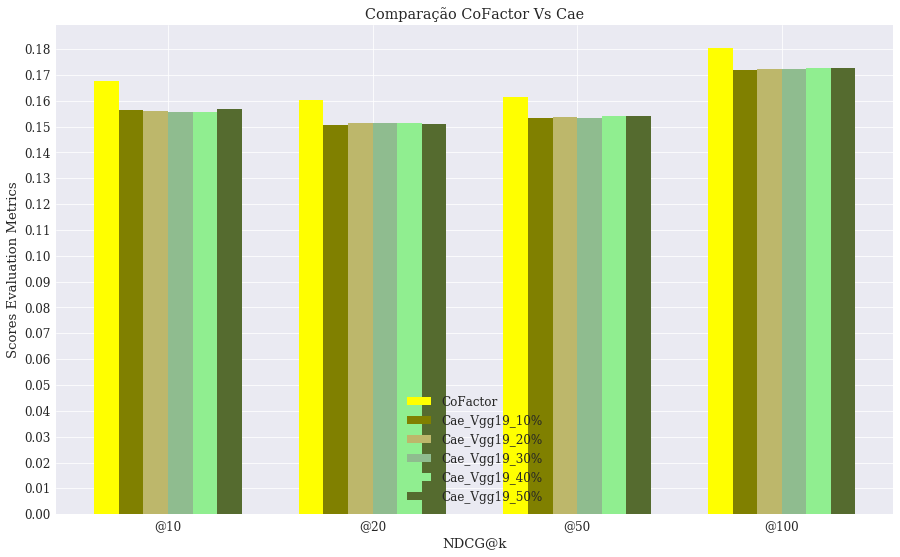

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1566  0.1507  0.1532  0.1720
20%       0.1561  0.1514  0.1536  0.1721
30%       0.1558  0.1512  0.1535  0.1721
40%       0.1557  0.1513  0.1539  0.1726
50%       0.1567  0.1508  0.1540  0.1727





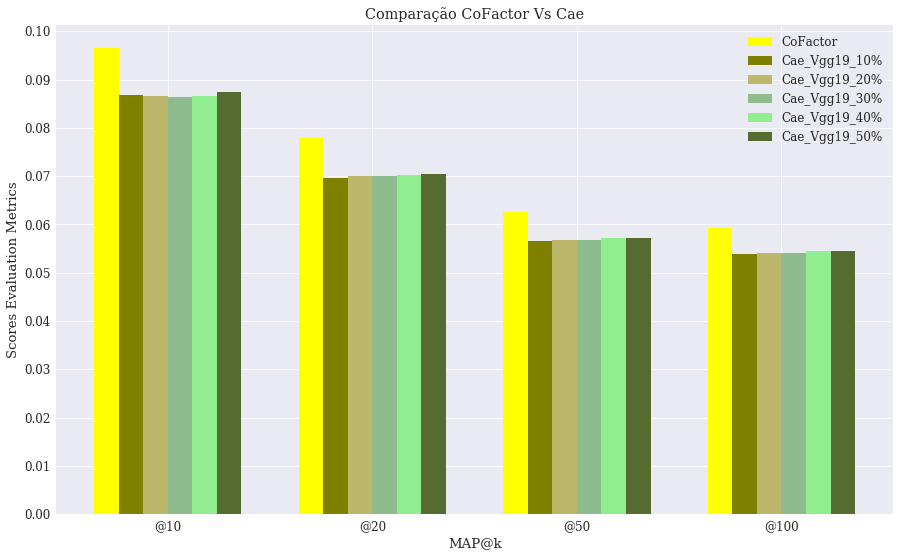

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0868  0.0696  0.0565  0.0539
20%       0.0866  0.0701  0.0568  0.0541
30%       0.0864  0.0700  0.0567  0.0540
40%       0.0867  0.0703  0.0571  0.0545
50%       0.0875  0.0704  0.0573  0.0546


In [13]:
list_file_name = ['cae_vgg19_10_pct_rec_val'
                  , 'cae_vgg19_20_pct_rec_val'
                  , 'cae_vgg19_30_pct_rec_val'
                  , 'cae_vgg19_40_pct_rec_val'
                  , 'cae_vgg19_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

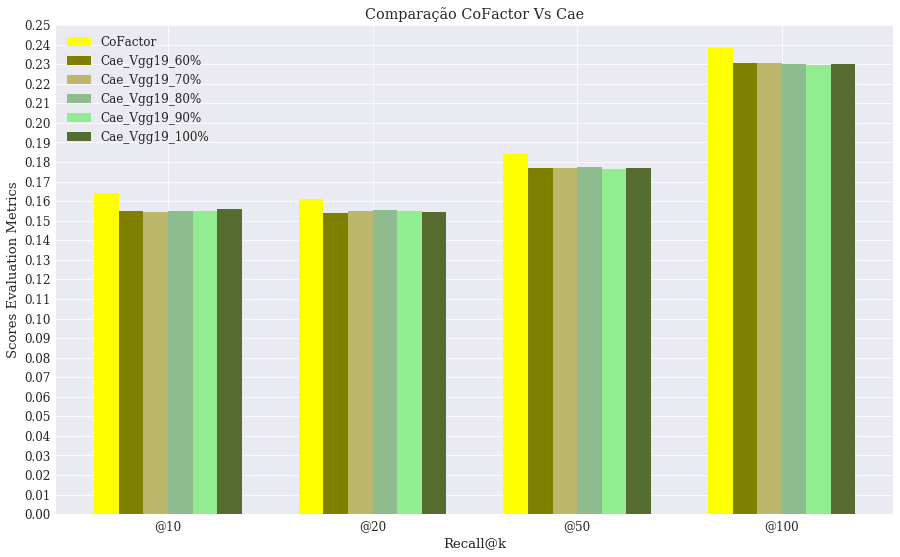

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1550  0.1539  0.1767  0.2304
70%       0.1542  0.1547  0.1767  0.2308
80%       0.1547  0.1554  0.1773  0.2301
90%       0.1547  0.1550  0.1766  0.2296
100%      0.1560  0.1544  0.1769  0.2301





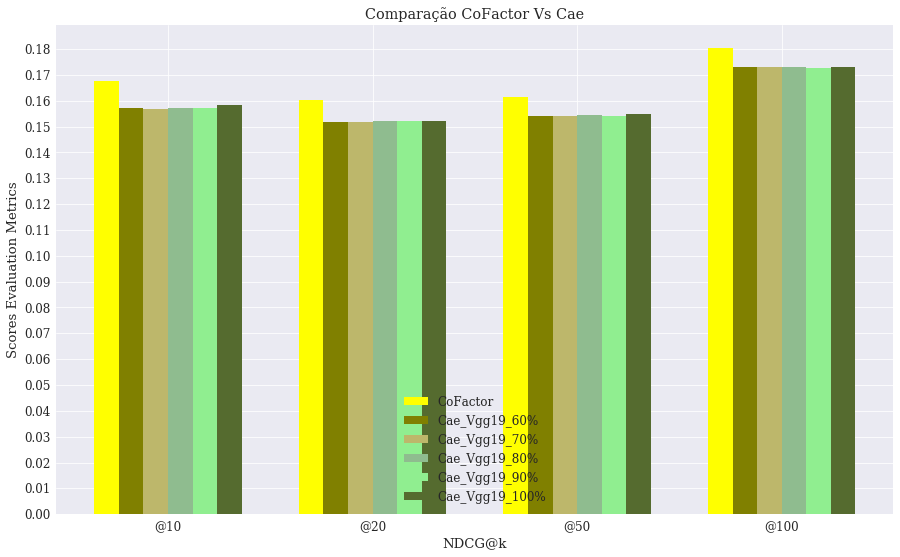

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1572  0.1516  0.1541  0.1730
70%       0.1568  0.1519  0.1542  0.1730
80%       0.1571  0.1523  0.1545  0.1731
90%       0.1570  0.1520  0.1542  0.1728
100%      0.1582  0.1523  0.1547  0.1732





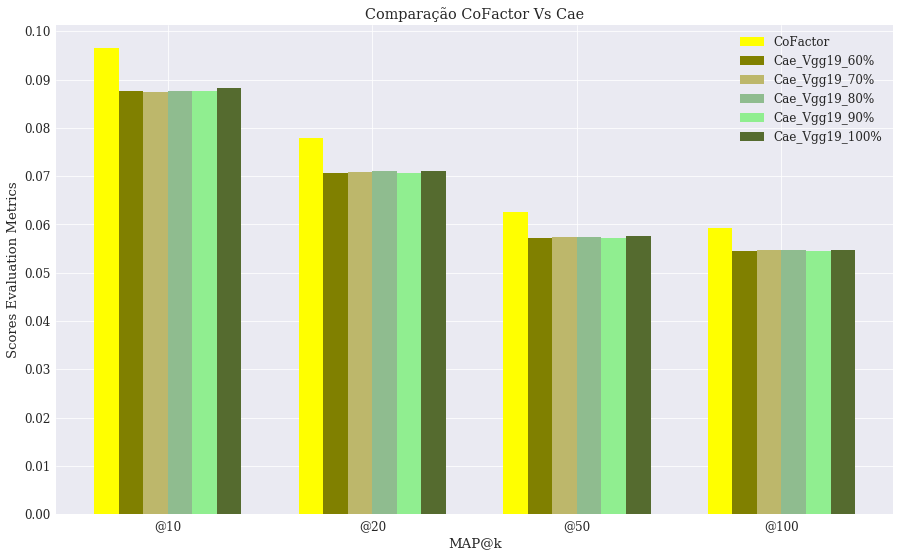

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0876  0.0707  0.0573  0.0546
70%       0.0874  0.0708  0.0574  0.0547
80%       0.0876  0.0711  0.0574  0.0547
90%       0.0876  0.0707  0.0573  0.0546
100%      0.0883  0.0711  0.0576  0.0548


In [14]:
list_file_name = ['cae_vgg19_60_pct_rec_val'
                  , 'cae_vgg19_70_pct_rec_val'
                  , 'cae_vgg19_80_pct_rec_val'
                  , 'cae_vgg19_90_pct_rec_val'
                  , 'cae_vgg19_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Xception

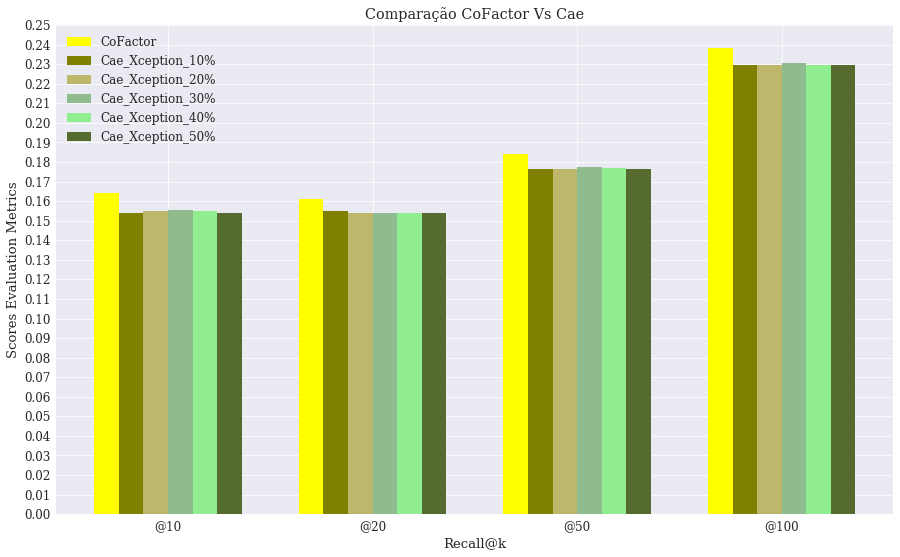

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1538  0.1548  0.1765  0.2294
20%       0.1551  0.1540  0.1762  0.2297
30%       0.1554  0.1538  0.1773  0.2308
40%       0.1550  0.1539  0.1770  0.2295
50%       0.1539  0.1540  0.1764  0.2297





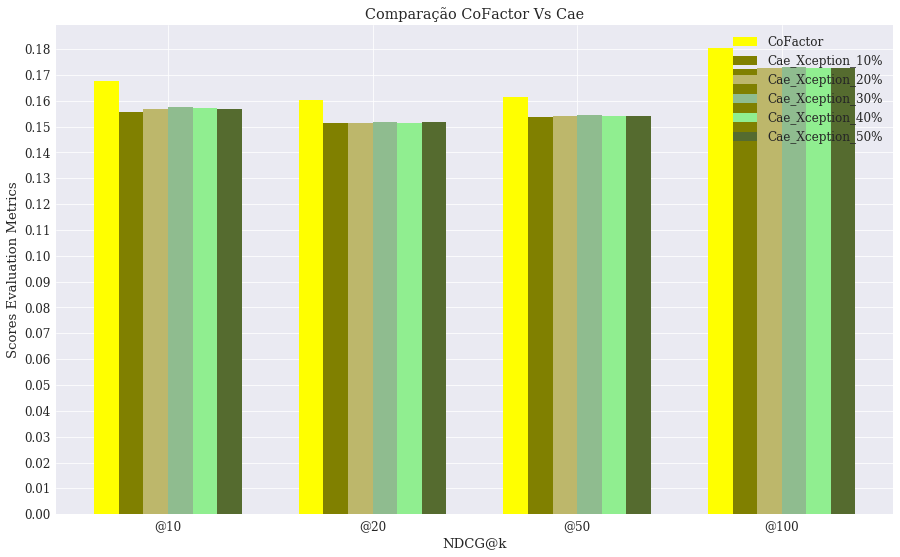

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1558  0.1514  0.1538  0.1723
20%       0.1569  0.1513  0.1542  0.1728
30%       0.1576  0.1516  0.1545  0.1731
40%       0.1570  0.1513  0.1542  0.1727
50%       0.1568  0.1516  0.1542  0.1727





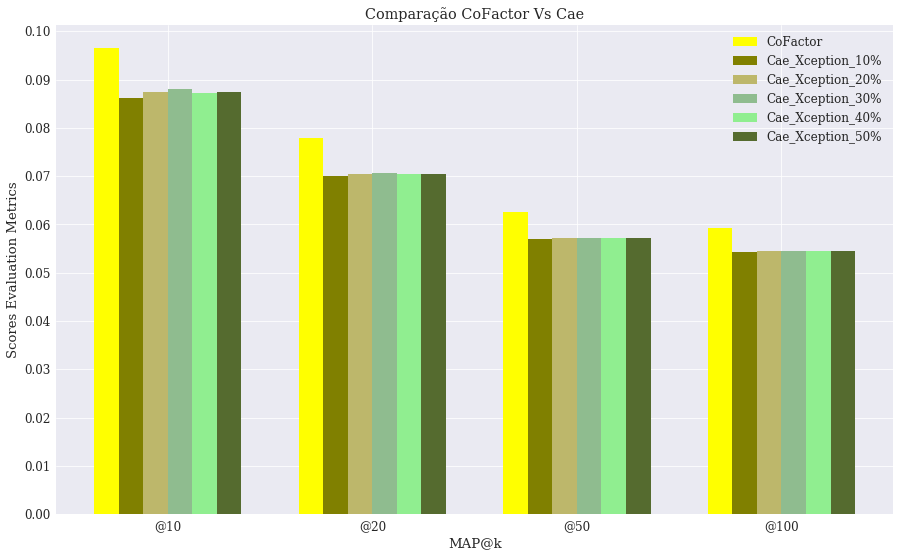

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0862  0.0701  0.0569  0.0542
20%       0.0874  0.0704  0.0573  0.0546
30%       0.0880  0.0706  0.0573  0.0546
40%       0.0873  0.0704  0.0571  0.0545
50%       0.0875  0.0704  0.0572  0.0545


In [15]:
list_file_name = ['cae_xception_10_pct_rec_val'
                  , 'cae_xception_20_pct_rec_val'
                  , 'cae_xception_30_pct_rec_val'
                  , 'cae_xception_40_pct_rec_val'
                  , 'cae_xception_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

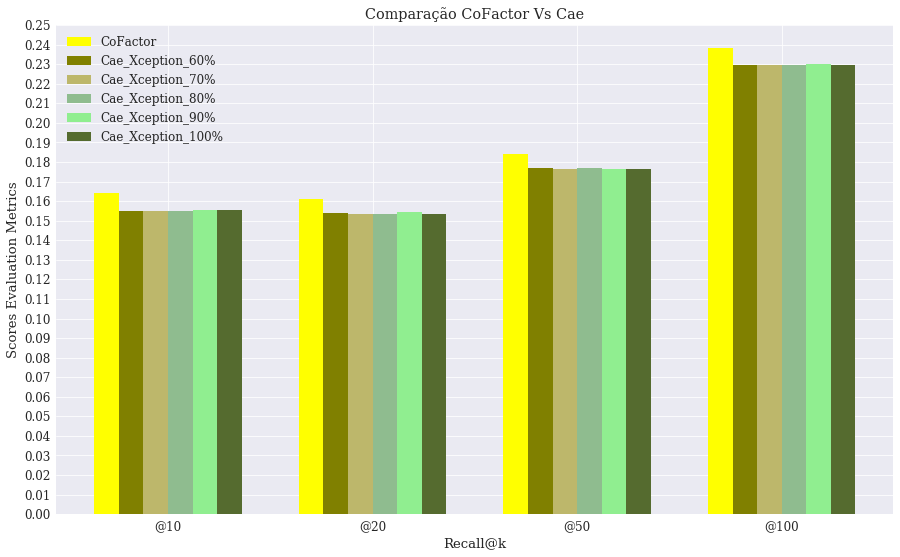

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1548  0.1537  0.1770  0.2294
70%       0.1549  0.1533  0.1766  0.2297
80%       0.1548  0.1536  0.1767  0.2296
90%       0.1553  0.1542  0.1765  0.2302
100%      0.1552  0.1535  0.1763  0.2296





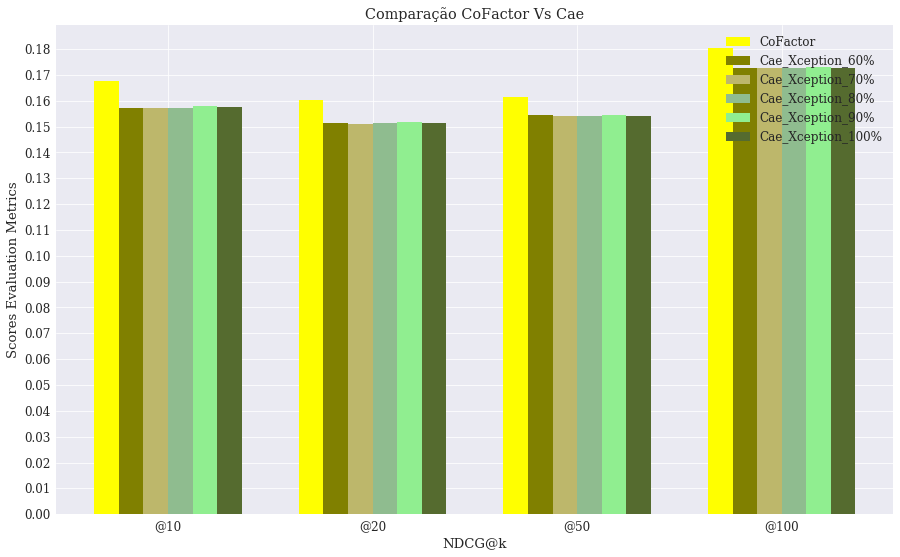

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1571  0.1514  0.1543  0.1727
70%       0.1572  0.1511  0.1542  0.1728
80%       0.1572  0.1512  0.1542  0.1727
90%       0.1580  0.1518  0.1544  0.1730
100%      0.1577  0.1515  0.1542  0.1726





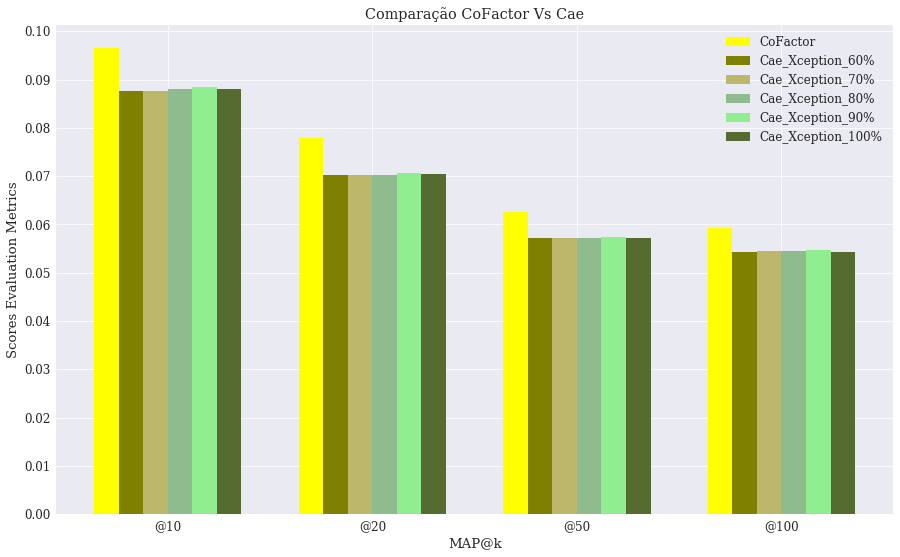

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0877  0.0703  0.0571  0.0544
70%       0.0877  0.0702  0.0572  0.0546
80%       0.0880  0.0703  0.0573  0.0546
90%       0.0884  0.0706  0.0574  0.0547
100%      0.0881  0.0705  0.0573  0.0544


In [16]:
list_file_name = ['cae_xception_60_pct_rec_val'
                  , 'cae_xception_70_pct_rec_val'
                  , 'cae_xception_80_pct_rec_val'
                  , 'cae_xception_90_pct_rec_val'
                  , 'cae_xception_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)
